In [188]:
#导入数据
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import scipy.stats as scs
%matplotlib inline
plt.style.use('fivethirtyeight')
data=pd.read_excel('老人数量.xls') 
data

,年份,65岁及以上
0,2008,10956.00000
1,2009,11309.00000
2,2010,11883.00000
3,2011,12288.00000
4,2012,12714.00000
5,2013,13161.00000
6,2014,13755.00000
7,2015,14386.00000
8,2016,15003.00000
9,2017,15831.00000


In [189]:
data=pd.Series(data['65岁及以上'].values,\
                             index=pd.DatetimeIndex(start='2008-12-31',end='2020-12-31',freq='A'))
data

2008-12-31    10956.00000
2009-12-31    11309.00000
2010-12-31    11883.00000
2011-12-31    12288.00000
2012-12-31    12714.00000
2013-12-31    13161.00000
2014-12-31    13755.00000
2015-12-31    14386.00000
2016-12-31    15003.00000
2017-12-31    15831.00000
2018-12-31    16658.00000
2019-12-31    17603.00000
2020-12-31    18722.54077
Freq: A-DEC, dtype: float64

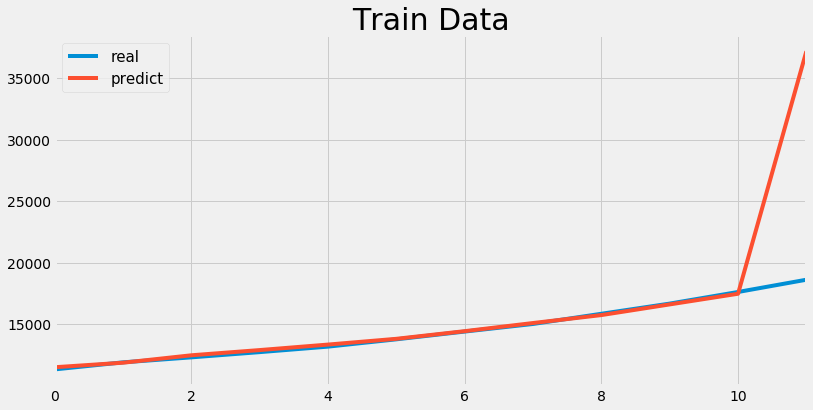

In [59]:
#展示效果
pred = results.get_prediction(start=pd.to_datetime('2008-12-31'), dynamic=False)
y_train_predict = pred.predicted_mean.values
y_train = y.values
y_train_predict = y_train_predict[1:]
y_train = y_train[1:]
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题
plt.show()

[11483.69188264 11853.69400335 12455.34051126 12879.84719367
 13326.36533369 13794.89493131 14417.50473217 15078.89662501
 15725.61421278 16593.49454126 17460.32670509 37173.38306738
 19325.777069   20306.67688663 20998.77519001 21726.76007209
 22490.63153286 23505.70904448 24584.01529    25638.39714972
 27053.35368108 28466.60132773]


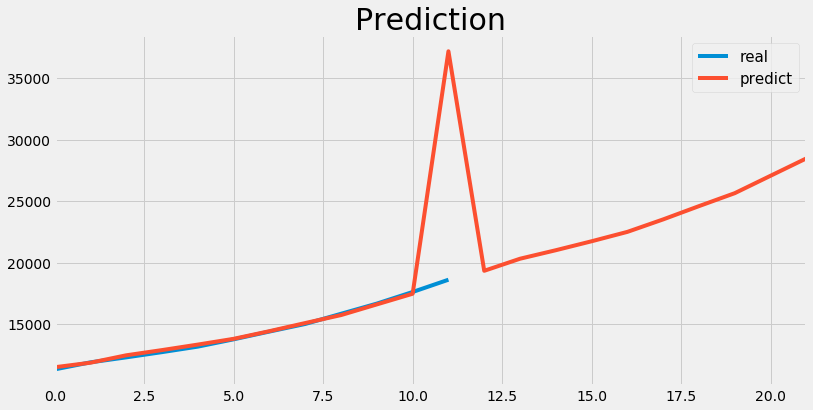

In [69]:
#在测试集上进行预测
pred_uc = results.get_prediction(start=pd.to_datetime('2009-12-31'),end=pd.to_datetime('2030-12-31'), dynamic=False)  
y_test_predict=pred_uc.predicted_mean
y_test_predict=y_test_predict.values
print(y_test_predict)
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_test_predict)],axis=1)
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Prediction",fontsize='30') #添加标题
plt.show()

In [169]:
#用来画残差图 直接调用即可
import statsmodels.tsa.api as smt
import scipy.stats as scs
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [170]:
#滑动平均模型
#拟合模型+检验模型 残差不能相关
mod = sm.tsa.ExponentialSmoothing(data)
results = mod.fit()

[10956.      11309.      11883.      12288.      12714.      13161.
 13755.      14386.      15003.      15831.      16658.      17603.
 18722.54077 18722.54077 18722.54077 18722.54077 18722.54077 18722.54077
 18722.54077 18722.54077 18722.54077 18722.54077]


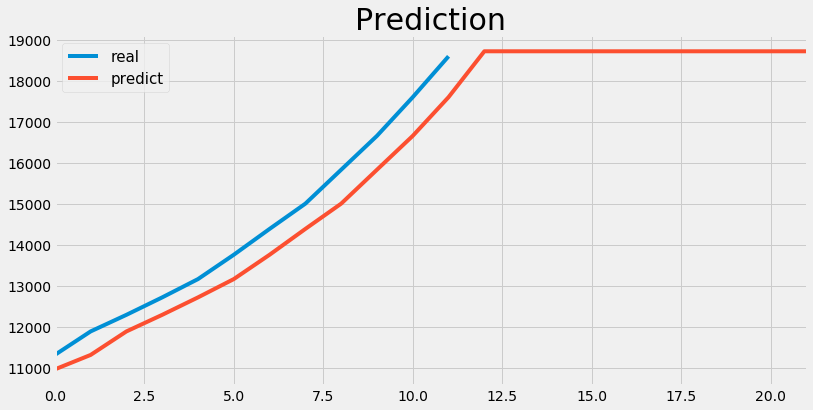

In [171]:
#在测试集上进行预测
pred_uc = results.predict(start=pd.to_datetime('2009-12-31'),end=pd.to_datetime('2030-12-31'))  
y_test_predict=pred_uc
y_test_predict=y_test_predict.values
print(y_test_predict)
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_test_predict)],axis=1)
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Prediction",fontsize='30') #添加标题
plt.show()

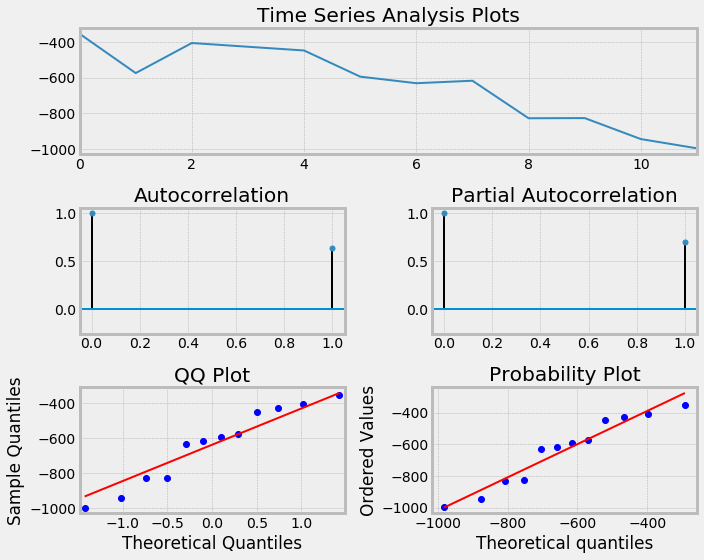

In [172]:
#在训练集上进行预测
y_train_predict = results.predict(start=0,)
y_train = y.values
y_train_predict = y_train_predict[1:].values
y_train = y_train[1:]
#检验模型 残差不能相关
residual=y_train_predict-y_train
tsplot(residual, lags=1)

aic: 187.74890 | order: (4, 0)
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   13
Model:                     ARMA(4, 0)   Log Likelihood                 -88.874
Method:                           mle   S.D. of innovations            122.987
Date:                Sat, 11 Jul 2020   AIC                            187.749
Time:                        17:28:55   BIC                            190.574
Sample:                    12-31-2008   HQIC                           187.168
                         - 12-31-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        1.9315      0.004    507.063      0.000       1.924       1.939
ar.L2.y       -0.4759        nan        nan        nan         nan         nan
ar.L3.y       -0.8634

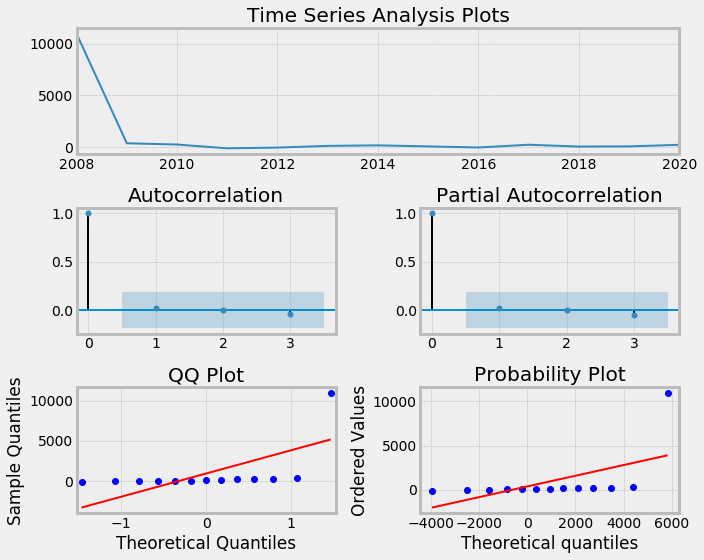

In [174]:
best_aic = np.inf 
best_order = None
best_mdl = None

rng = range(5)
for i in rng:
    for j in rng:
        try:
            tmp_mdl = smt.ARMA(data, order=(i, j)).fit(method='mle', trend='nc')
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, j)
                best_mdl = tmp_mdl
        except: continue
print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))
print(best_mdl.summary())
_ = tsplot(best_mdl.resid, lags=3)

aic: 158.75009 | order: (1, 1, 0)


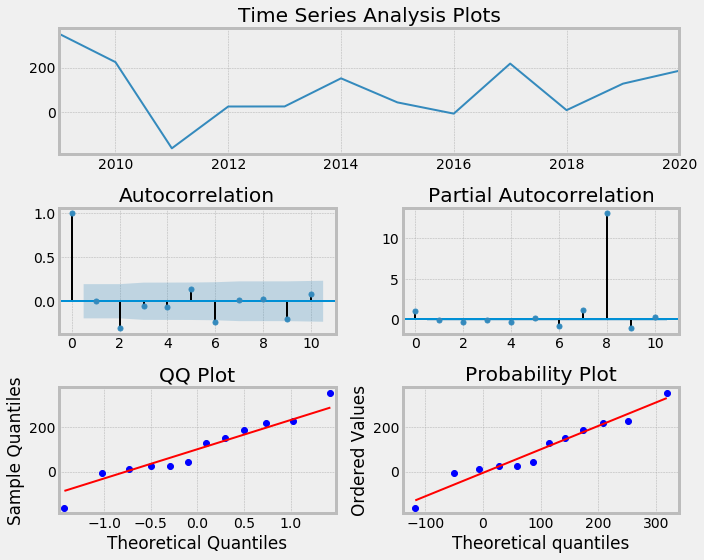

In [175]:
# Fit ARIMA(p, d, q) model to SPY Returns
# pick best order and final model based on aic

best_aic = np.inf 
best_order = None
best_mdl = None

pq_rng = range(5) # [0,1,2,3,4]
d_rng = range(2) # [0,1]
for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                tmp_mdl = smt.ARIMA(data, order=(i,d,j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))
# aic: -11518.22902 | order: (4, 0, 4)

# ARIMA model resid plot
_ = tsplot(best_mdl.resid, lags=10)

In [176]:
# Create a 21 day forecast of SPY returns with 95%, 99% CI
n_steps = 10

f, err95, ci95 = best_mdl.forecast(steps=n_steps) # 95% CI
_, err99, ci99 = best_mdl.forecast(steps=n_steps, alpha=0.01) # 99% CI

idx = pd.date_range(data.index[-1], periods=n_steps, freq='A')
fc_95 = pd.DataFrame(np.column_stack([f, ci95]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([ci99]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all.head()

,forecast,lower_ci_95,lower_ci_99,upper_ci_95,upper_ci_99
2020-12-31,19827.342988,19570.082595,19489.245521,20084.603381,20165.440455
2021-12-31,20917.600684,20345.376187,20165.570219,21489.825181,21669.631150
2022-12-31,21993.505335,21040.837993,20741.488218,22946.172677,23245.522451
2023-12-31,23055.245895,21667.639513,21231.621987,24442.852277,24878.869803
2024-12-31,24103.008833,22233.476180,21646.026445,25972.541485,26559.991220


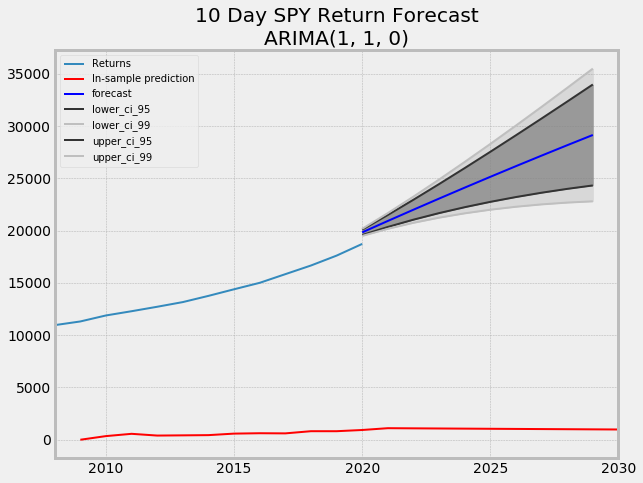

In [178]:
# Plot 21 day forecast for SPY returns

plt.style.use('bmh')
fig = plt.figure(figsize=(9,7))
ax = plt.gca()

ts = data.copy()
ts.plot(ax=ax, label='Returns')
# in sample prediction
pred = best_mdl.predict(start=pd.to_datetime('2009-12-31'),end=pd.to_datetime('2030-12-31'))
pred.plot(ax=ax, style='r-', label='In-sample prediction')

styles = ['b-', '0.2', '0.75', '0.2', '0.75']
fc_all.plot(ax=ax, style=styles)
plt.fill_between(fc_all.index, fc_all.lower_ci_95, fc_all.upper_ci_95, color='gray', alpha=0.7)
plt.fill_between(fc_all.index, fc_all.lower_ci_99, fc_all.upper_ci_99, color='gray', alpha=0.2)
plt.title('{} Day SPY Return Forecast\nARIMA{}'.format(n_steps, best_order))
plt.legend(loc='best', fontsize=10)

In [181]:
best_mdl.predict(start=pd.to_datetime('2009-12-31'),end=pd.to_datetime('2030-12-31'))


2009-12-31       0.000000
2010-12-31     348.352819
2011-12-31     566.443394
2012-12-31     399.668248
2013-12-31     420.391787
2014-12-31     441.115326
2015-12-31     586.180097
2016-12-31     622.692999
2017-12-31     608.877306
2018-12-31     817.099530
2019-12-31     816.112694
2020-12-31     932.559246
2021-12-31    1104.802218
2022-12-31    1090.257696
2023-12-31    1075.904651
2024-12-31    1061.740560
2025-12-31    1047.762937
2026-12-31    1033.969328
2027-12-31    1020.357308
2028-12-31    1006.924489
2029-12-31     993.668509
2030-12-31     980.587043
Freq: A-DEC, dtype: float64

In [148]:
f, err95, ci95 = best_mdl.forecast(steps=n_steps) # 95% CI
best_mdl.forecast(steps=10)

(array([19827.34298796, 20917.60068425, 21993.50533487, 23055.24589508,
        24103.00883258, 25136.97816023, 26157.33546842, 27164.25995693,
        28157.92846641, 29138.51550942]),
 array([ 131.25771441,  291.95663876,  486.06369793,  707.97544909,
         953.86071744, 1220.90608372, 1506.92877374, 1810.16728425,
        2129.15814504, 2462.65821208]),
 array([[19570.08259502, 20084.6033809 ],
        [20345.37618724, 21489.82518126],
        [21040.83799273, 22946.17267702],
        [21667.63951294, 24442.85227723],
        [22233.47618012, 25972.54148503],
        [22744.04620762, 27529.91011283],
        [23203.80934462, 29110.86159222],
        [23616.39727381, 30712.12264005],
        [23984.85518474, 32331.00174807],
        [24311.79410751, 33965.23691132]]))

In [166]:
best_mdl.predict(start=pd.to_datetime('2008-12-31'))

KeyError: Timestamp('2008-12-31 00:00:00')